In [16]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/111.0.5563.65"})
    soup=bts(result.text,"html.parser")
    return soup

In [5]:
pages=["https://wunderflats.com/en/furnished-apartments/paris"]
for page in range(2,19):
    pages.append("https://wunderflats.com/en/furnished-apartments/paris/" +str (page))
    
pages

['https://wunderflats.com/en/furnished-apartments/paris',
 'https://wunderflats.com/en/furnished-apartments/paris/2',
 'https://wunderflats.com/en/furnished-apartments/paris/3',
 'https://wunderflats.com/en/furnished-apartments/paris/4',
 'https://wunderflats.com/en/furnished-apartments/paris/5',
 'https://wunderflats.com/en/furnished-apartments/paris/6',
 'https://wunderflats.com/en/furnished-apartments/paris/7',
 'https://wunderflats.com/en/furnished-apartments/paris/8',
 'https://wunderflats.com/en/furnished-apartments/paris/9',
 'https://wunderflats.com/en/furnished-apartments/paris/10',
 'https://wunderflats.com/en/furnished-apartments/paris/11',
 'https://wunderflats.com/en/furnished-apartments/paris/12',
 'https://wunderflats.com/en/furnished-apartments/paris/13',
 'https://wunderflats.com/en/furnished-apartments/paris/14',
 'https://wunderflats.com/en/furnished-apartments/paris/15',
 'https://wunderflats.com/en/furnished-apartments/paris/16',
 'https://wunderflats.com/en/furnis

In [6]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"Listing-link"}):
        links.append("https://wunderflats.com" + resulthf.get("href"))

links

['https://wunderflats.com/en/furnished-apartment/exceptional-apartment-pigalle-blanche/63ce6463bd734f66d745ff0d?dataLayerKey=ZohyaJqk2BIru5AlcIpUR',
 'https://wunderflats.com/en/furnished-apartment/pure-paris-lovely-2-bedroom-home-in-montmartre-2-bedroom-with-2-queen-beds/63c69a9826f301e9ae347944?dataLayerKey=ZohyaJqk2BIru5AlcIpUR',
 'https://wunderflats.com/en/furnished-apartment/pretty-nice-apartment-montmartre/63d8065241bf2050dc9b0c6c?dataLayerKey=ZohyaJqk2BIru5AlcIpUR',
 'https://wunderflats.com/en/furnished-apartment/rental-furnished-flat-with-two-bedrooms-3-rooms-92m2/63bee5a5e232cecc0d5faeb3?dataLayerKey=ZohyaJqk2BIru5AlcIpUR',
 'https://wunderflats.com/en/furnished-apartment/g/t4-flatshare-one-bedroom-in-a-flat-with-a-total-of-3-bedrooms/_pFqvob44QZu5VR9YCRbD?dataLayerKey=ZohyaJqk2BIru5AlcIpUR',
 'https://wunderflats.com/en/furnished-apartment/charming-studio-quartier-odeon-for-2-people/63c825bced9320d43ba786ef?dataLayerKey=ZohyaJqk2BIru5AlcIpUR',
 'https://wunderflats.com/en/f

In [7]:
len(links)

520

In [8]:
ex=getAndParseURL("https://wunderflats.com/en/furnished-apartment/furnished-two-room-flat-very-bright/63bfcebe14fef279bde4137e?dataLayerKey=ZohyaJqk2BIru5AlcIpUR")

In [9]:
### For Rent Price ###
ex.find("strong",{"class":"ListingPriceText-value"}).text.replace("€","").replace(",","").strip()

'1789'

In [10]:
### Net Area Of Flat###
ex.find("span",{"class":"ListingDetails-statsElt floor"}).text[0:3].strip()

'45'

In [11]:
### Location Info ###
ex.find("span",{"class":"txt-light"}).text.strip()

'Rue la Condamine, 75017, Paris'

In [12]:
### Capacity ###
ex.find("span",{"class":"ListingDetails-statsElt guests"}).text.strip()

'2 People'

In [13]:
### Bedroom Number ###
ex.find("span",{"class":"ListingDetails-statsElt rooms"}).text.replace("Rooms","").strip()

'2'

In [14]:
### Deposit ###
ex.findAll("div",{"class":"CostOverview-itemRow"})[1].text.replace("Security deposit€","").replace(",","").strip()

'1789'

In [15]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("span",{"class":"txt-light"}).text.strip()
    except:
        location = np.nan
    try:
        rent= html.find("strong",{"class":"ListingPriceText-value"}).text.replace("€","").replace(",","").strip()
    except:
        rent = np.nan
    try:
        deposit = html.findAll("div",{"class":"CostOverview-itemRow"})[1].text.replace("Security deposit€","").replace(",","").strip()
    except:
        deposit = np.nan
    try:
        rooms = html.find("span",{"class":"ListingDetails-statsElt rooms"}).text.replace("Rooms","").strip()
    except:
        rooms = np.nan
    try:
        capacity = html.find("span",{"class":"ListingDetails-statsElt guests"}).text.strip()
    except:
        capacity = np.nan
    try:
        net_area = html.find("span",{"class":"ListingDetails-statsElt floor"}).text[0:3].strip()
    except:
        net_area = np.nan
    time.sleep(2)
    
    result.append([location,rent,deposit,rooms,capacity,net_area])
    
columns=["Location","Rent","Deposit","Rooms","Capacity","Net Area"]
df = pd.DataFrame.from_records(result, columns=columns)

In [16]:
df

,Location,Rent,Deposit,Rooms,Capacity,Net Area
0,"Rue Chaptal, 75009, Paris",14368,20000,5,10 People,180
1,"Rue Damrémont, 75018, Paris",3723,500,3,4 People,55
2,"Square de Clignancourt, 75018, Paris",1000,1000,1 Room,2 People,10
3,"Boulevard Poissonnière, 75009, Paris",4316,4316,3,4 People,92
4,"Rue Marcel Paul, 94800, Villejuif",805,805,2,1 Person,57
...,...,...,...,...,...,...
515,"Rue Fondary, 75015, Paris",4650,0,2,2 People,25
516,"Avenue de Paris, 94800, Villejuif",3131,700,2,4 People,40
517,"Rue Fondary, 75015, Paris",4375,0,1 Room,2 People,18
518,"Avenue de Paris, 94800, Villejuif",2449,500,1 Room,2 People,23


In [17]:
df.to_csv("paris_rent.csv")

In [2]:
df=pd.read_csv("paris_rent.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  520 non-null    int64 
 1   Location    520 non-null    object
 2   Rent        520 non-null    int64 
 3   Deposit     520 non-null    int64 
 4   Rooms       520 non-null    object
 5   Capacity    520 non-null    object
 6   Net Area    520 non-null    object
dtypes: int64(3), object(4)
memory usage: 28.6+ KB


In [4]:
df["Rent"].mean()

3294.3076923076924

In [5]:
df["Rent"].max()

25263

In [6]:
df["Rent"].min()

805

In [11]:
df["Deposit"].mean()

4291.0526315789475

In [8]:
df["Deposit"].min()

0

In [9]:
df["Deposit"].max()

45800

In [10]:
df= df.loc[(df["Deposit"] >= 2620) & (df["Rent"] <= 46000),:]

In [17]:
df["Rooms"].unique()

array(['5', '3', '2', '4', 1, '7'], dtype=object)

In [21]:
df["Rooms"]=df["Rooms"].astype(int)

In [14]:
df["Rooms"]=df["Rooms"].apply(lambda x : 1 if x =="1 Room" else x)

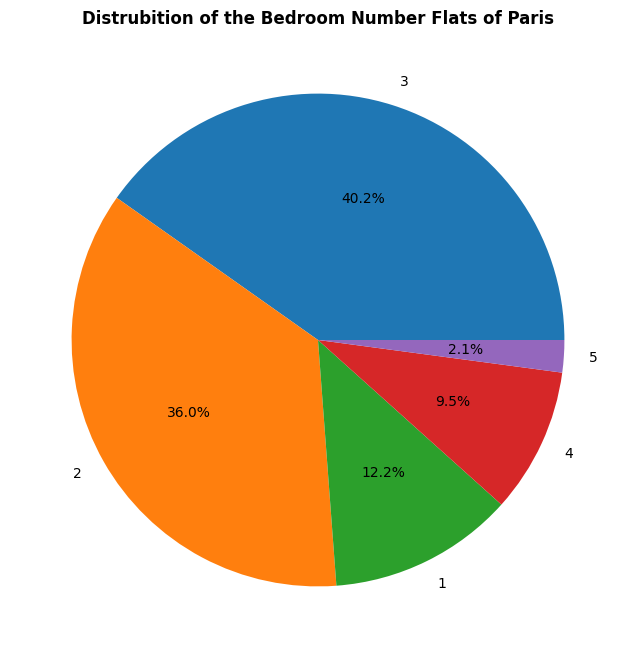

In [18]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Rooms'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Paris',weight="bold")

# display the chart
plt.show();


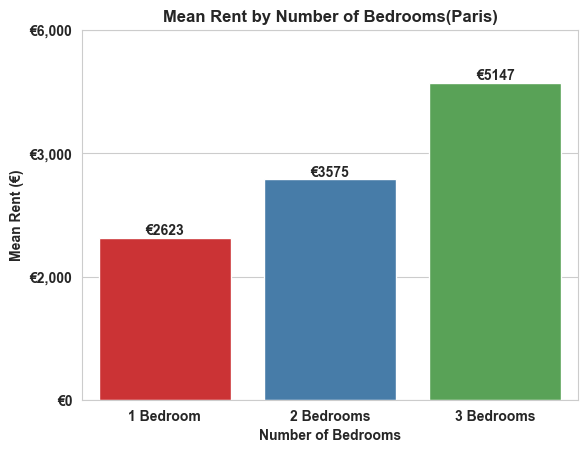

In [24]:
### Calculate mean rent for each group + add expenses ###
one_bed_mean_rent = df[df['Rooms'] == 1]['Rent'].mean()
two_bed_mean_rent = df[df['Rooms'] == 2]['Rent'].mean()
three_bed_mean_rent = df[df['Rooms'] == 3]['Rent'].mean()

### Create a bar plot ###
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000, 4000,6000])
ax.set_yticklabels(['€0', '€2,000', '€3,000','€6,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Paris)', weight='bold')

plt.show();